In [1]:
library(tidyverse)
library(ggthemes)
library(hrbrthemes)
library(reshape2)
library(ggtext)

options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
df <- read_csv("data_dump.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  date = col_date(format = ""),
  income_first = col_double(),
  income_other = col_double(),
  max_loan_first = col_double(),
  max_loan_other = col_double(),
  properties_for_first = col_double(),
  properties_for_other = col_double(),
  month = col_date(format = ""),
  total = col_double()
)




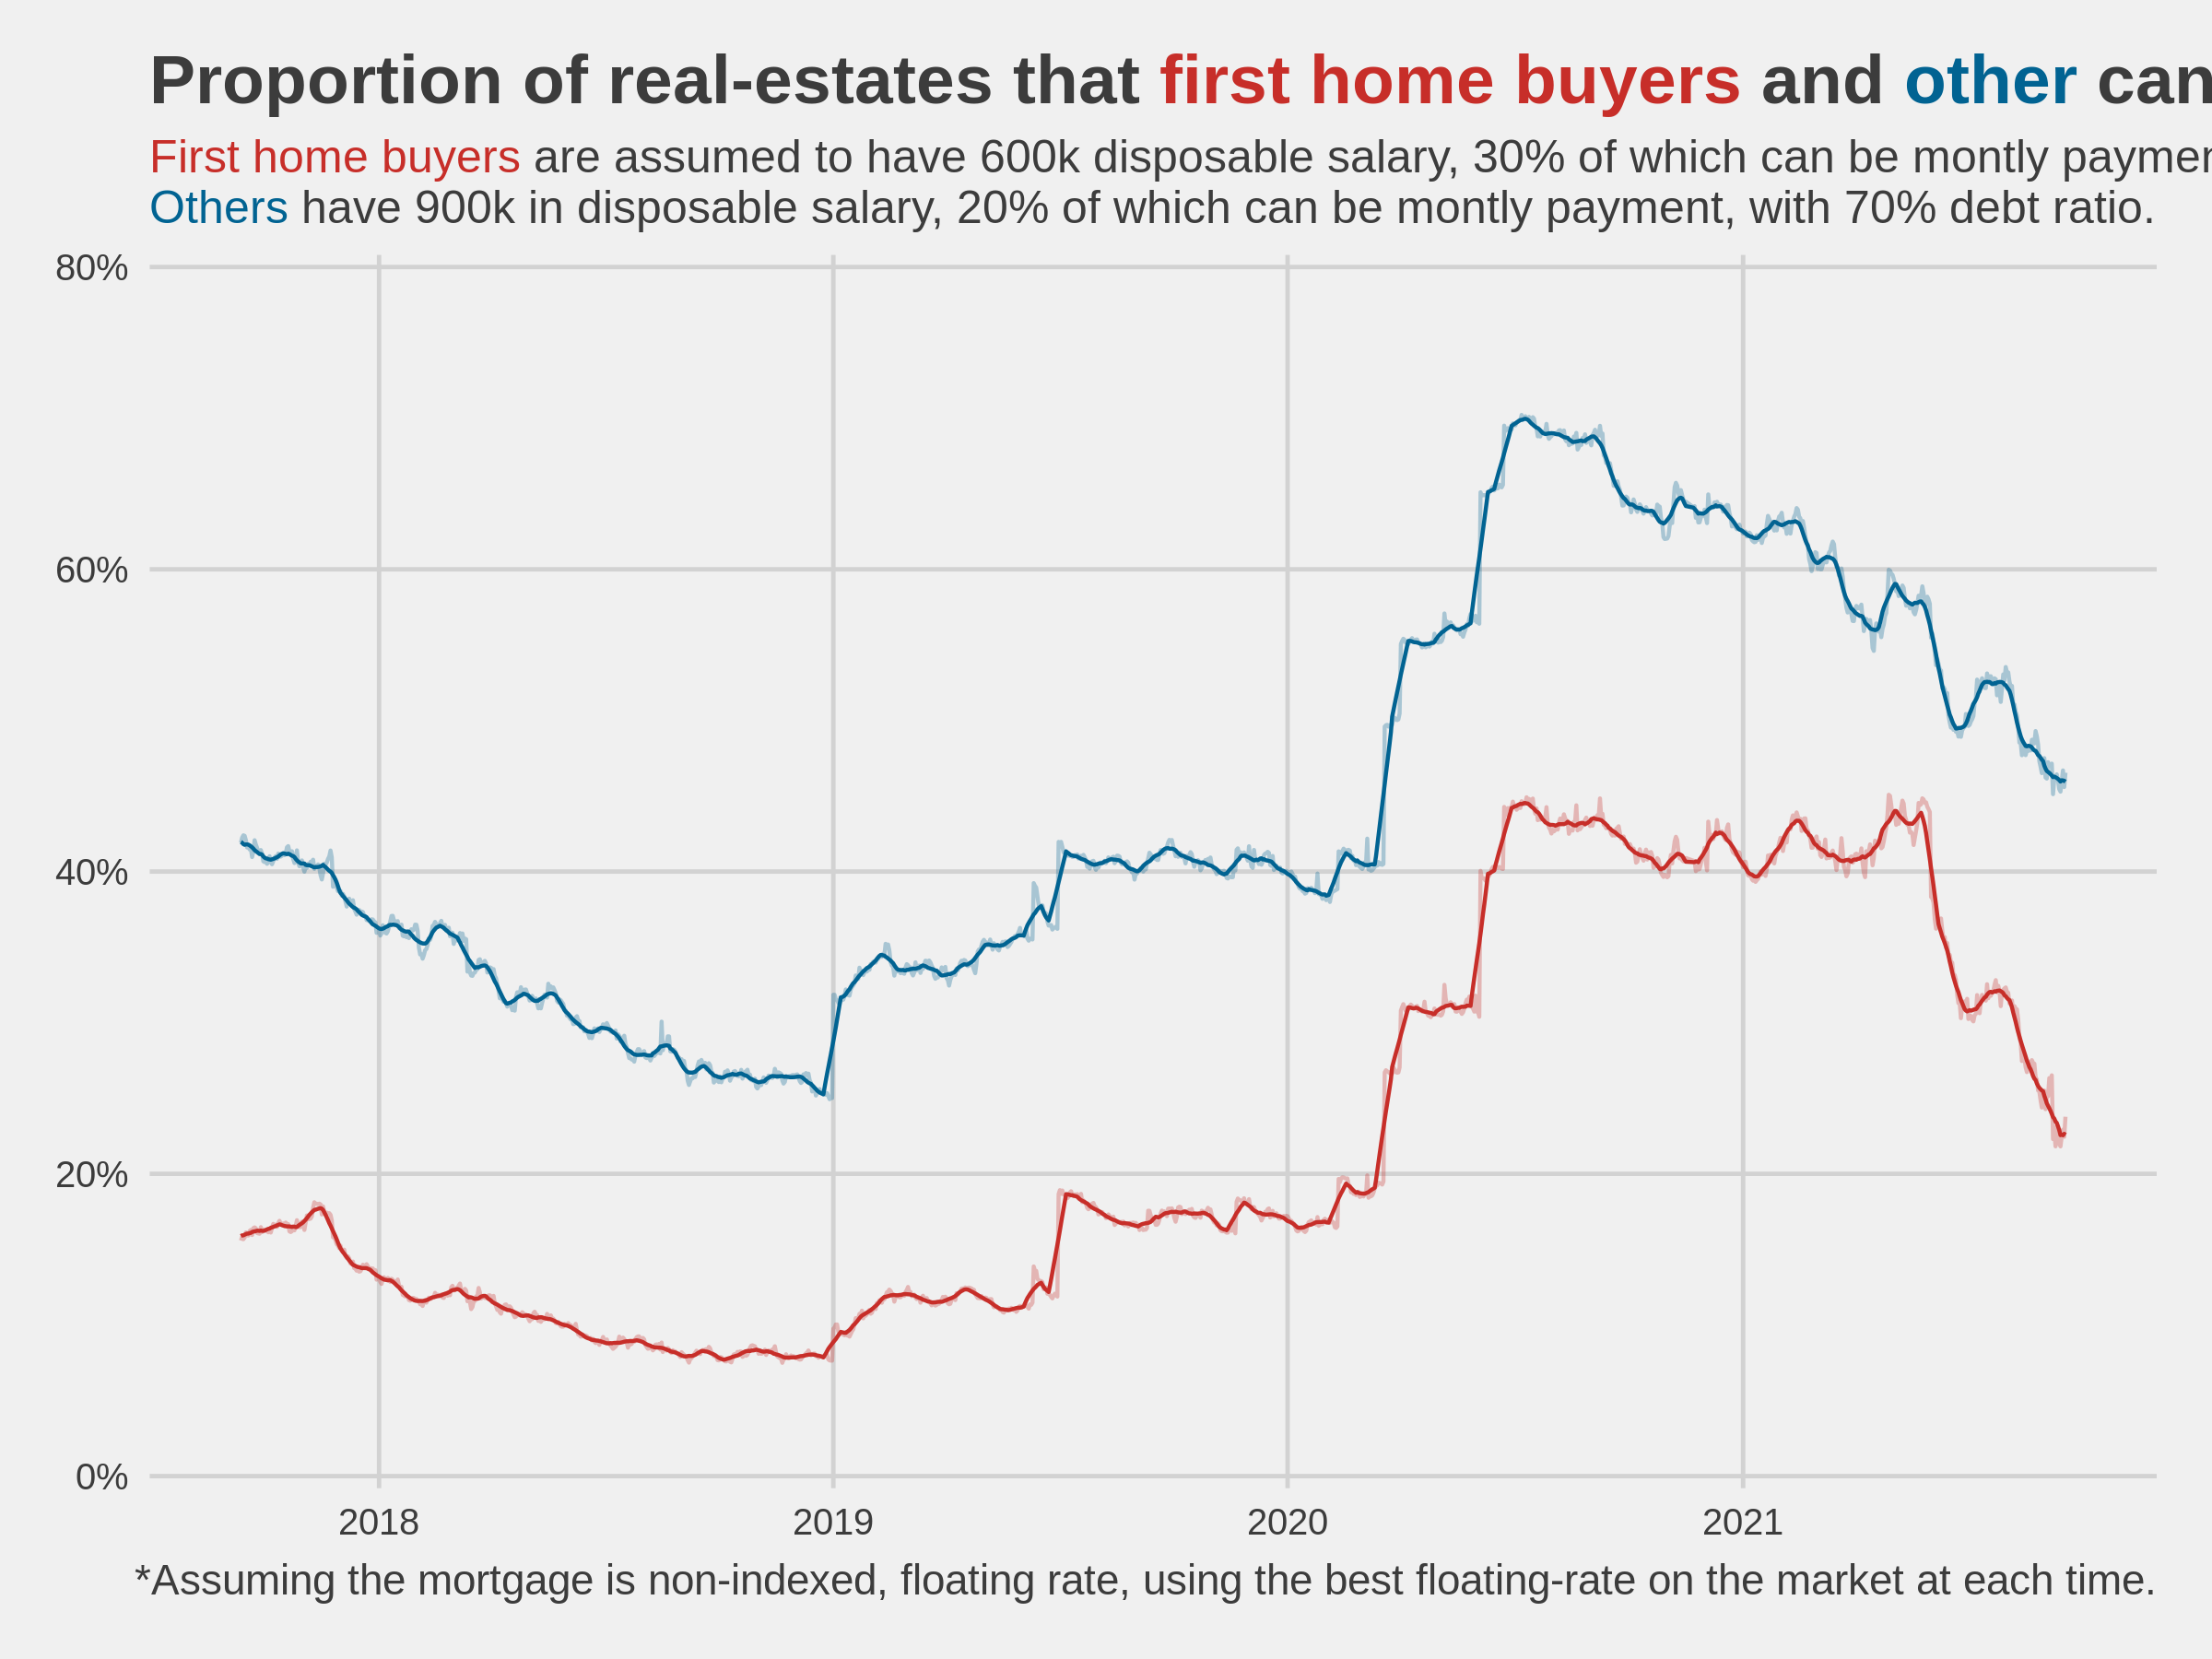

In [4]:
wsj_red <- ggthemes::wsj_pal()(2)[1]
wsj_blue <- ggthemes::wsj_pal()(2)[2]


p <- df %>%
mutate(
    pct_for_first = properties_for_first/total,
    pct_for_other = properties_for_other/total
) %>%
select(date, pct_for_first, pct_for_other) %>%
reshape2::melt(id = 'date')  %>%
group_by(variable) %>%
mutate(value.ma = caTools::runmean(value, 14)) %>%
ggplot(aes(x = date)) +
    geom_line(aes(y = value, color = variable), alpha=.3) +
    geom_line(aes(y = value.ma, color = variable)) +
    ggthemes::theme_fivethirtyeight() +
    ggthemes::scale_color_wsj() +
    hrbrthemes::scale_y_percent(limits = c(0, 0.8)) +
    scale_x_date(labels = scales::label_date_short()) +
    labs(
        title=glue::glue("Proportion of real-estates in the capital region that <span style='color:{wsj_red}'>first home buyers</span> and <span style='color:{wsj_blue}'>other</span> can afford"),
        subtitle=glue::glue("<span style='color:{wsj_red}'>First home buyers</span> are assumed to have 600k disposable salary, 30% of which can be montly payment, with maximum debt ratio.<br> 
                             <span style='color:{wsj_blue}'>Others</span> have 900k in disposable salary, 20% of which can be montly payment, with 70% debt ratio."),
        caption="*Assuming the mortgage is non-indexed, floating rate, using the best floating-rate on the market at each time."
    ) +
    theme(
        plot.title = element_markdown(lineheight = 1.1),
        plot.subtitle = element_markdown(lineheight = 1.1),
        legend.text = element_markdown(size = 11),
        plot.caption = element_markdown(size = 11),
        legend.position = 'none',
        panel.grid.minor.x = element_blank()
    )
    
ggsave("plots/availability_buyers_pct.png", p, width=12, height=8)
p

In [ ]:

p <- df %>%
select(date, properties_for_first, properties_for_other) %>%
reshape2::melt(id = 'date')  %>%
group_by(variable) %>%
mutate(value.ma = caTools::runmean(value, 14)) %>%
ggplot(aes(x = date)) +
    geom_line(aes(y = value, color = variable), stat='identity', alpha=.3) +
    geom_line(aes(y = value.ma, color = variable), stat='identity') +
    ggthemes::theme_fivethirtyeight() +
    ggthemes::scale_color_wsj() +
    labs(
        title=glue::glue("Number of real-estates in the capital region that <span style='color:{wsj_red}'>first home buyers</span> and <span style='color:{wsj_blue}'>other</span> can afford"),
        subtitle=glue::glue("<span style='color:{wsj_red}'>First home buyers</span> are assumed to have 600k disposable salary, 30% of which can be montly payment, with maximum debt ratio.<br> 
                             <span style='color:{wsj_blue}'>Others</span> have 900k in disposable salary, 20% of which can be montly payment, with 70% debt ratio."),
        caption="*Assuming the mortgage is non-indexed, floating rate, using the best floating-rate on the market at each time."
    ) +
    theme(
        plot.title = element_markdown(lineheight = 1.1),
        plot.subtitle = element_markdown(lineheight = 1.1),
        legend.text = element_markdown(size = 11),
        plot.caption = element_markdown(size = 11),
        legend.position = 'none',
        panel.grid.minor.x = element_blank()
    )
    
ggsave("plots/availability_buyers_total.png", p, width=12, height=8)
p

In [ ]:

p <- df %>%
select(date, total) %>%
reshape2::melt(id = 'date')  %>%
group_by(variable) %>%
mutate(value.ma = caTools::runmean(value, 14)) %>%
ggplot(aes(x = date)) +
    geom_line(aes(y = value, color = variable), stat='identity', alpha=.3) +
    geom_line(aes(y = value.ma, color = variable), stat='identity') +
    ggthemes::theme_fivethirtyeight() +
    ggthemes::scale_color_tableau() +
    labs(
        title=glue::glue("Total number of real-estates on the capital region market")
    ) +
    theme(
        plot.title = element_markdown(lineheight = 1.1),
        plot.subtitle = element_markdown(lineheight = 1.1),
        legend.text = element_markdown(size = 11),
        plot.caption = element_markdown(size = 11),
        legend.position = 'none',
        panel.grid.minor.x = element_blank()
    ) +
    ylim(c(0, 3200))
    
ggsave("plots/availability_total.png", p, width=12, height=8)
p

In [ ]:
df.city <- read_csv("count_by_city.csv")

p <- df.city %>%
select(date, total, city_name) %>%
group_by(city_name) %>%
mutate(total.ma = caTools::runmean(total, 14)) %>%
mutate(city_name = factor(city_name, levels=c("Garðabær", 'Hafnarfjörður', 'Kópavogur', 'Mosfellsbær', 'Reykjavík', 'Seltjarnarnes'))) %>%
ggplot(aes(x = date)) +
    geom_line(aes(y = total, color = city_name), stat='identity', alpha=.3) +
    geom_line(aes(y = total.ma, color = city_name), stat='identity') +
    ggthemes::theme_fivethirtyeight() +
    ggthemes::scale_color_tableau() +
    labs(
        title=glue::glue("Total number of real-estates on the capital region market"),
        subtile="Split up by city"
    ) +
    theme(
        plot.title = element_markdown(lineheight = 1.1),
        plot.subtitle = element_markdown(lineheight = 1.1),
        legend.text = element_markdown(size = 11),
        plot.caption = element_markdown(size = 11),
        legend.position = 'none',
        panel.grid.minor.x = element_blank()
    ) +
    facet_wrap(~city_name, scales='free_y')

ggsave("plots/availability_total_by_city.png", p, width=12, height=8)
p

In [ ]:
df.city <- read_csv("newbuilt.csv")

p <- df.city %>%
select(date, total, city_name) %>%
group_by(city_name) %>%
mutate(total.ma = caTools::runmean(total, 14)) %>%
mutate(city_name = factor(city_name, levels=c("Garðabær", 'Hafnarfjörður', 'Kópavogur', 'Mosfellsbær', 'Reykjavík', 'Seltjarnarnes'))) %>%
ggplot(aes(x = date)) +
    geom_bar(aes(y = total, fill = city_name), stat='identity') +
    ggthemes::theme_fivethirtyeight() +
    ggthemes::scale_fill_tableau() +
    scale_x_date(labels = scales::label_date_short()) +
    labs(
        title=glue::glue("Total number of new real-estates on the capital region market"),
        subtitle='Split up by city',
        fill=''
    ) +
    theme(
        plot.title = element_markdown(lineheight = 1.1),
        plot.subtitle = element_markdown(lineheight = 1.1),
        legend.text = element_markdown(size = 11),
        plot.caption = element_markdown(size = 11),
        legend.position = 'bottom',
        panel.grid.minor.x = element_blank()
    )

ggsave("plots/availability_total_newbuilt.png", p, width=12, height=8)
p

###### df.city